# Project : Soccerdataset Analysis

Table of content : 
    Introduction
    Questions
    Data Wrangling
    Data Cleaning
    Exploratory Data Analysis
    Conclusions
    limitation
  

## Introduction : 

This soccer database comes from Kaggle .
It contains data for soccer matches, players, and teams from several European countries from 2008 to 2016. The dataset contains +25,000 matches, +10,000 players, 11 European Countries with their lead championship, Seasons 2008 to 2016, Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates, Team line up with squad formation (X, Y coordinates), Betting odds from up to 10 providers and Detailed match events (goal types, possession, corner, cross, fouls, cards etc…) for +10,000 matches.

## Questions

While Examining the tables, I posed a few questions in front of me: 
does playing at home affect the winning percentage?
which foot players prefer ?
does the player get a beter rating if he scores more ?


## Data Wrangling 


In this section I have loaded the tables from the database and looked at the 
general format of the data contained in the tables and the
changes I need to make for this tables  i also choose the table i need to get my work done 
i will work with  player_attributes table and match table :

In [1]:
# Importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sqlite3

In [2]:
#loaading data : 
connection=sqlite3.connect(r"c:\Users\Pc\Desktop\nourhene\database (1).sqlite")
df_country= pd.read_sql_query("SELECT * FROM Country",connection)
df_league= pd.read_sql_query("SELECT * FROM League",connection)
df_match= pd.read_sql_query("SELECT * FROM Match",connection)
df_player=pd.read_sql_query("SELECT * FROM Player",connection)
df_player_attributes= pd.read_sql_query("SELECT * FROM Player_Attributes",connection)
df_team= pd.read_sql_query("SELECT * FROM Team",connection)
df_team_attributes= pd.read_sql_query("SELECT * FROM Team_Attributes",connection)


match table :

In [3]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [4]:
df_match.shape

(25979, 115)

In [5]:
#Checking for null values
df_match.isnull().sum()

id                0
country_id        0
league_id         0
season            0
stage             0
              ...  
GBD           11817
GBA           11817
BSH           11818
BSD           11818
BSA           11818
Length: 115, dtype: int64

a lot of null values we will go back in the data cleaning 

we will see the player_attributes table :

In [6]:
df_player_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [11]:
df_player_attributes.shape

(183978, 42)

In [13]:
df_player_attributes.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [15]:
df_player_attributes.duplicated().sum()

0

In [16]:
df_player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

## Data Cleaning 

the match table : 

In [17]:
#Dropping Columns with null values
df_match.dropna(axis=1,inplace=True)

In [18]:
df_match.duplicated().sum()

0

to reply to the first question we just need some columns : acces to just a group of value

In [19]:
df_match= df_match.loc[:,'country_id':'away_team_goal']

In [20]:
df_match.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


In [ ]:
we cant found any columns that specify if the team lost or won the game we add new columns based on the goals 
scored in each match in columns home_team_goal and away_team_goal 

In [21]:
draw= df_match['home_team_goal']==df_match['away_team_goal']
home_win= df_match['home_team_goal']>df_match['away_team_goal']
away_win= df_match['home_team_goal']<df_match['away_team_goal']

In [22]:
df_match['draw']=draw
df_match['home_win']=home_win
df_match['away_win']=away_win

in match table we are not able to see the names of teams, countries and leagues so we use the map function to get the name for each id.

In [23]:
df_match['country'] = df_match.country_id.map(df_country.set_index('id')['name'].to_dict())


In [24]:
df_match['league'] = df_match.league_id.map(df_league.set_index('id')['name'].to_dict())

In [25]:
df_match['home_team'] = df_match.home_team_api_id.map(df_team.set_index('team_api_id')['team_long_name'].to_dict())

In [26]:
df_match['away_team'] = df_match.away_team_api_id.map(df_team.set_index('team_api_id')['team_long_name'].to_dict())

we can now drop the columns

In [27]:
df_match.drop(['country_id','league_id','match_api_id','home_team_goal','away_team_goal'], inplace=True, axis=1)

In [28]:
df_match.head()

,season,stage,date,home_team_api_id,away_team_api_id,draw,home_win,away_win,country,league,home_team,away_team
0,2008/2009,1,2008-08-17 00:00:00,9987,9993,True,False,False,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC
1,2008/2009,1,2008-08-16 00:00:00,10000,9994,True,False,False,Belgium,Belgium Jupiler League,SV Zulte-Waregem,Sporting Lokeren
2,2008/2009,1,2008-08-16 00:00:00,9984,8635,False,False,True,Belgium,Belgium Jupiler League,KSV Cercle Brugge,RSC Anderlecht
3,2008/2009,1,2008-08-17 00:00:00,9991,9998,False,True,False,Belgium,Belgium Jupiler League,KAA Gent,RAEC Mons
4,2008/2009,1,2008-08-16 00:00:00,7947,9985,False,False,True,Belgium,Belgium Jupiler League,FCV Dender EH,Standard de Liège


## Exploratory Data Analysis

the first question : does playing at home affect the winning percentage?
let's calculate the home win percentage and the away win percentage 

In [29]:
home_win_percentage=round(len(df_match[df_match['home_win']==True])/len(df_match),3)*100
away_win_percentage=round(len(df_match[df_match['away_win']==True])/len(df_match),3)*100
draw_percentage=round(len(df_match[df_match['draw']==True])/len(df_match),3)*100


In [30]:
print('The average winning percentage at home ={}%'.format(home_win_percentage))
print('The average winning percentage while away ={}%'.format(away_win_percentage))
print('While the average draw percentage={}'.format(draw_percentage))

The average winning percentage at home =45.9%
The average winning percentage while away =28.7%
While the average draw percentage=25.4


let's create a bar chart with proper labels

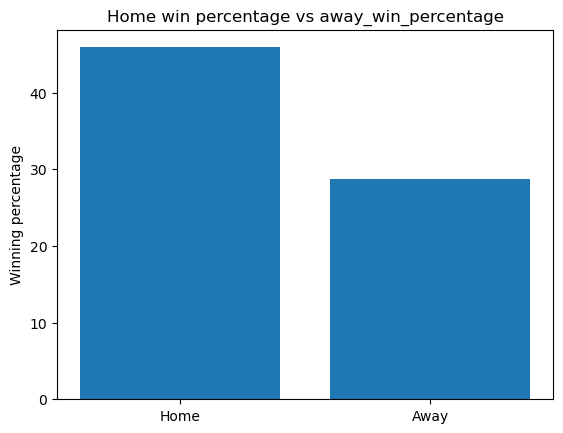

In [31]:
locations = [1, 2]
heights = [home_win_percentage, away_win_percentage]
labels = ['Home', 'Away']
plt.bar(locations, heights, tick_label=labels)
plt.title('Home win percentage vs away_win_percentage')
plt.ylabel('Winning percentage');

x axis represent if the percentage is related to home or away , y axis represent the winning percentage .
we can see a huge difference between the height of the bars the difference is almost 15% 


the second question : which foot players prefer ? 

In [33]:
df_player_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [34]:
#the count of players with preferred foots
foot = df_player_attributes.groupby('preferred_foot')['preferred_foot'].count()
foot

preferred_foot
left      44733
right    138409
Name: preferred_foot, dtype: int64

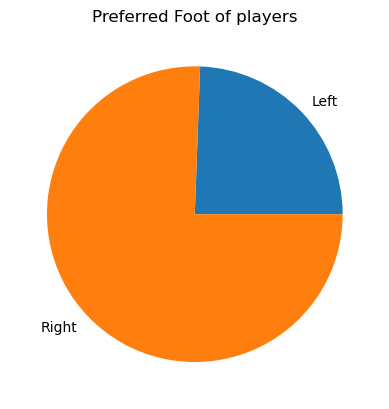

In [35]:
#Plotting pie chart 
plt.pie(foot,labels=['Left','Right'])
plt.title('Preferred Foot of players');

This pie chart shows the proportions of preferred foot classification : we can see a huge differences between the size of the slices the right slice is more than 75 % of the pie chart .

does the player get a beter rating if he scores more ?

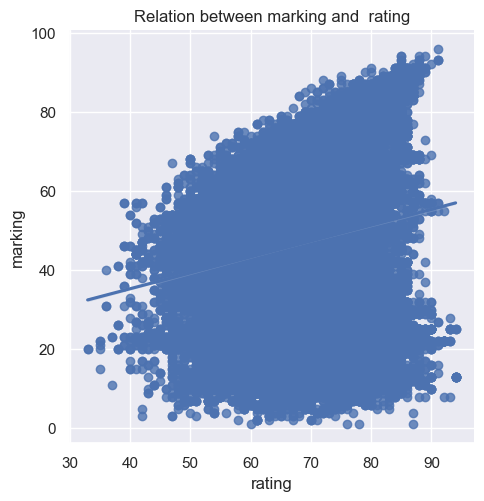

In [36]:
sns.set()
sns.lmplot(x='overall_rating',y='marking',data=df_player_attributes)
plt.title('Relation between marking and  rating')
plt.xlabel('rating')
plt.ylabel('marking');

this scatterplot shows the relation between marking and rating
When the marking variable tends to increase as the rating variable increases,
we say there is a positive correlation between the variables.

### conclusion

1) After analyzing this data we can see a clear correlation between playing at home and win percentage.
2) player prefers the right foot
3)The plot  shows a positive relationship between marking (scoring) and rating

## Limitation 

Data is not available  for all matches. There could have been different number of samples available for a team's matches played at home and away. 